<a href="https://colab.research.google.com/github/sk-075/Titanic-Survival-Prediction/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
perfom data preprocessing on the given dataset.

Here is all the data you need:
"Titanic-Dataset.csv"

## Data loading

### Subtask:
Load the Titanic dataset.


**Reasoning**:
Load the Titanic dataset into a pandas DataFrame and display its basic information.



In [20]:
import pandas as pd

try:
    df = pd.read_csv('Titanic-Dataset.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'Titanic-Dataset.csv' not found.")
    df = None # Ensure df is defined even in case of error
except Exception as e:
    print(f"An error occurred: {e}")
    df = None

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


(891, 12)


## Data exploration

### Subtask:
Explore the Titanic dataset to understand its structure.


**Reasoning**:
I need to explore the dataset by examining data types, descriptive statistics, missing values, unique values of categorical features, and visualize the distributions of numerical features to understand the dataset's characteristics.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

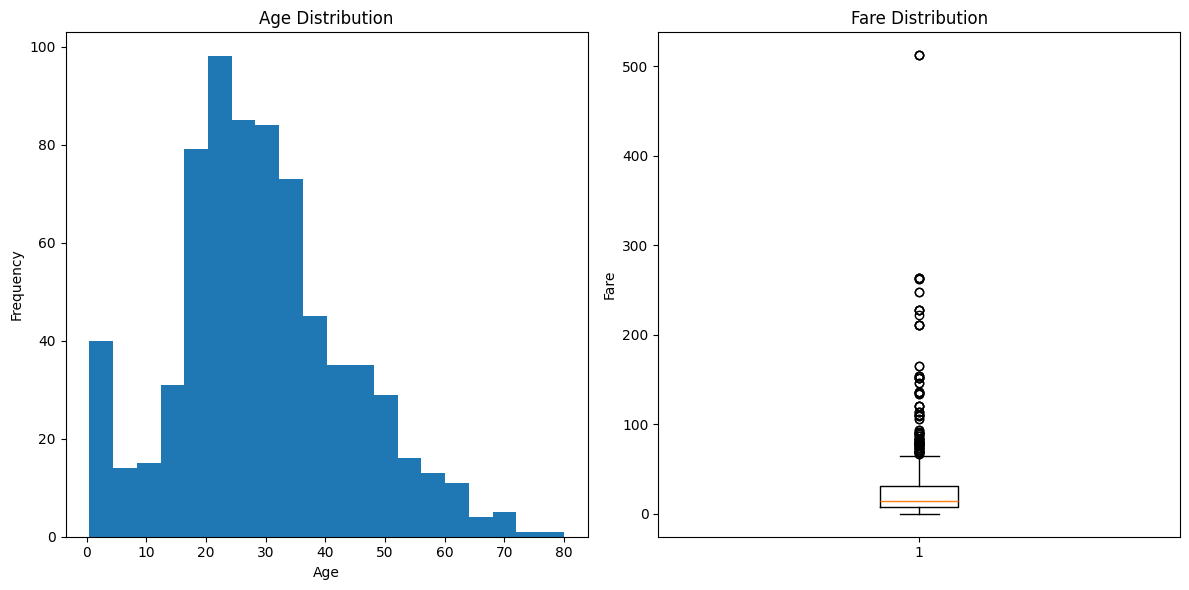

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


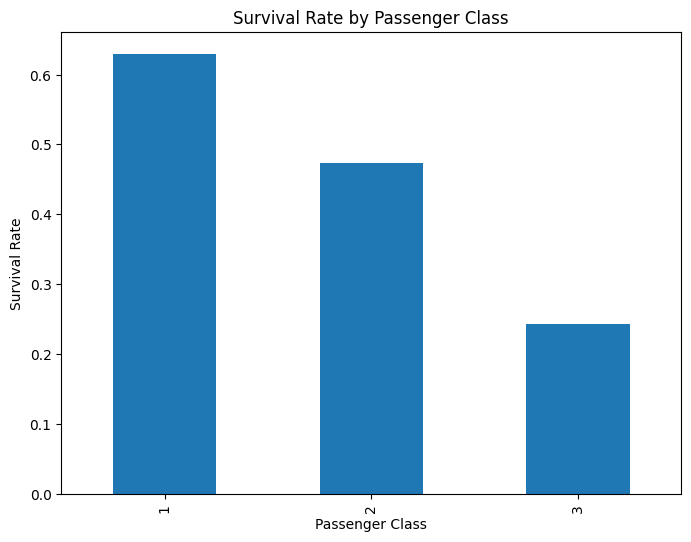

In [21]:
# Identify data types and inconsistencies
print(df.info())

# Summarize descriptive statistics for numerical features
print(df.describe())

# Check for missing values
print(df.isnull().sum())
print(df.isnull().sum() / len(df) * 100)

# Analyze unique values for categorical features
for col in ['Pclass', 'Sex', 'Embarked']:
    print(f"\nUnique values for {col}: {df[col].unique()}")
    print(df[col].value_counts())

# Visualize the distribution of key numerical features
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['Age'].dropna(), bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.boxplot(df['Fare'].dropna())
plt.title('Fare Distribution')
plt.ylabel('Fare')

plt.tight_layout()
plt.show()

# Explore relationships between features
print(df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())

plt.figure(figsize=(8, 6))
df.groupby('Pclass')['Survived'].mean().plot(kind='bar')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

## Data cleaning

### Subtask:
Clean the Titanic dataset by handling missing values and removing duplicates.


**Reasoning**:
Impute missing values for 'Age', 'Embarked', create 'HasCabin' and remove duplicates as instructed. Then verify the cleaning by checking for missing values and the shape of the DataFrame.



In [22]:
# Impute missing 'Age' values by median age within each passenger class
df['Age'] = df.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))

# Impute missing 'Embarked' values with the most frequent embarkation point
most_frequent_embarked = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(most_frequent_embarked)

# Create 'HasCabin' feature and drop the original 'Cabin' column
df['HasCabin'] = df['Cabin'].notna().astype(int)
df = df.drop('Cabin', axis=1)

# Remove duplicate rows, keeping the first occurrence
df = df.drop_duplicates(keep='first')

# Verify the cleaning
print(df.isnull().sum())
print(df.shape)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
HasCabin       0
dtype: int64
(891, 12)


## Data wrangling

### Subtask:
Convert categorical features to numerical representations and potentially create new features.


**Reasoning**:
Convert categorical features to numerical representations, create new features as instructed, and drop unnecessary columns.



In [23]:
# Convert 'Sex' to numerical values
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One-hot encode 'Embarked'
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')
df = pd.concat([df, embarked_dummies], axis=1)
df = df.drop('Embarked', axis=1)

# Create 'FamilySize' feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Extract titles from 'Name'
import re
df['Title'] = df['Name'].apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1) if re.search(' ([A-Z][a-z]+)\.', x) else 'Unknown')
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

# Convert titles to numerical values
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
df['Title'] = df['Title'].map(title_mapping)
df['Title'] = df['Title'].fillna(0)

# Drop unnecessary columns
df = df.drop(['Name', 'Ticket', 'PassengerId'], axis=1)

display(df.head())

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,HasCabin,Embarked_C,Embarked_Q,Embarked_S,FamilySize,Title
0,0,3,0,22.0,1,0,7.2500,0,False,False,True,2,1
1,1,1,1,38.0,1,0,71.2833,1,True,False,False,2,3
2,1,3,1,26.0,0,0,7.9250,0,False,False,True,1,2
3,1,1,1,35.0,1,0,53.1000,1,False,False,True,2,3
4,0,3,0,35.0,0,0,8.0500,0,False,False,True,1,1


## Data preparation

### Subtask:
Scale numerical features in the Titanic dataset.


**Reasoning**:
Scale the numerical features using StandardScaler.



In [24]:
from sklearn.preprocessing import StandardScaler

# Identify numerical features to scale
numerical_cols = ['Age', 'Fare', 'FamilySize']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the numerical features
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

display(df.head())

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,HasCabin,Embarked_C,Embarked_Q,Embarked_S,FamilySize,Title
0,0,3,0,-0.533834,1,0,-0.502445,0,False,False,True,0.059160,1
1,1,1,1,0.674891,1,0,0.786845,1,True,False,False,0.059160,3
2,1,3,1,-0.231653,0,0,-0.488854,0,False,False,True,-0.560975,2
3,1,1,1,0.448255,1,0,0.420730,1,False,False,True,0.059160,3
4,0,3,0,0.448255,0,0,-0.486337,0,False,False,True,-0.560975,1


## Summary:

### 1. Q&A

No questions were posed in the provided data analysis task.


### 2. Data Analysis Key Findings

* **Missing Value Imputation:**  Missing 'Age' values were imputed using the median age for each passenger class, and missing 'Embarked' values were filled with the most frequent port of embarkation.  'Cabin' information was replaced with a binary 'HasCabin' feature indicating cabin presence or absence.
* **Feature Engineering:**  A 'FamilySize' feature was created by summing 'SibSp', 'Parch', and 1.  Passenger titles were extracted from the 'Name' column, grouped into categories (Mr, Miss, Mrs, Master, Rare), and converted into numerical representations.
* **Categorical Feature Encoding:** 'Sex' was mapped to numerical values (0 for male, 1 for female), and 'Embarked' was one-hot encoded.
* **Data Scaling:** Numerical features 'Age', 'Fare', and 'FamilySize' were scaled using `StandardScaler` from `sklearn.preprocessing`, standardizing them to zero mean and unit variance.
* **Initial Missing Value Statistics:**  Initially, the dataset had 19.9% missing 'Age' values, 77.1% missing 'Cabin' values, and 0.2% missing 'Embarked' values.
* **Survival Rate by Passenger Class:**  The analysis revealed differences in survival rates across passenger classes, providing insight into a potential predictor variable.


### 3. Insights or Next Steps

* **Model Training:** The preprocessed dataset is now ready for model training to predict passenger survival.  Various classification algorithms can be tested to determine the most effective model for this task.
* **Feature Importance Analysis:** After model training, analyze feature importance to identify the most influential factors in predicting survival. This could reveal further insights into the Titanic disaster and refine feature engineering for improved model performance.


**Train/Test the Models**

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming 'Survived' is the target column
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models to compare
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Support Vector Machine': SVC(kernel='rbf', C=1, gamma='scale'),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Train, predict, and evaluate each model
best_model = None
best_score = 0

print("Model Performance:\n")
for name, model in models.items():
    model.fit(X_train, y_train)

    # Predictions
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    # Accuracy
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)

    print(f'{name}')
    print(f'  Training Accuracy: {train_acc:.4f}')
    print(f'  Testing Accuracy:  {test_acc:.4f}\n')

    if test_acc > best_score:
        best_score = test_acc
        best_model = model

print(f'Best model: {best_model.__class__.__name__} with testing accuracy {best_score:.4f}')


Model Performance:

Logistic Regression
  Training Accuracy: 0.8216
  Testing Accuracy:  0.7933

Random Forest
  Training Accuracy: 0.9860
  Testing Accuracy:  0.8212

Support Vector Machine
  Training Accuracy: 0.8371
  Testing Accuracy:  0.8268

Decision Tree
  Training Accuracy: 0.9860
  Testing Accuracy:  0.7709

Best model: SVC with testing accuracy 0.8268
